In [1]:
library('stringr')

#import featureCounts files into data frame

fnames <- list.files(path = 'featureCounts_counts', full.names = TRUE)
read.counts <- do.call(cbind, lapply(fnames, read.table, header = TRUE, sep = '\t', row.names = 1))
names(read.counts) <- str_sub(names(read.counts), start = 1, end = -26)

head(read.counts)

,combination_1,combination_2,decitabine_1,decitabine_2,dmso_1,dmso_2,rg3039_1,rg3039_2
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
DDX11L1,0,0,0,0,0,0,0,0
WASH7P,0,0,0,0,0,0,0,0
MIR1302-11,0,0,0,0,0,0,0,0
FAM138A,0,0,0,0,0,0,0,0
OR4G4P,0,0,0,0,0,0,0,0
OR4G11P,0,0,0,0,0,0,0,0


In [2]:
#defining factor levels for downstream DESeq analysis

sample_info <- data.frame(condition = gsub('_[0-9]+', '', names(read.counts)), row.names = names(read.counts))

head(sample_info)

,condition
,<fct>
combination_1,combination
combination_2,combination
decitabine_1,decitabine
decitabine_2,decitabine
dmso_1,dmso
dmso_2,dmso


In [3]:
library('DESeq2')

#create DESeqDataSet object and remove rows with 0 alignments

DESeq.ds <- DESeqDataSetFromMatrix(countData = read.counts, colData = sample_info, design = ~ condition)
DESeq.ds <- DESeq.ds[rowSums(counts((DESeq.ds))) > 0,]

counts(DESeq.ds)

Loading required package: S4Vectors

Warning message:
“package ‘S4Vectors’ was built under R version 3.6.1”
Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unspl

,combination_1,combination_2,decitabine_1,decitabine_2,dmso_1,dmso_2,rg3039_1,rg3039_2
RP11-34P13.7,0,0,0,0,2,0,0,0
AL627309.1,29,47,27,60,49,10,39,38
AP006222.2,0,0,6,4,0,2,0,2
MTND1P23,32,31,32,28,39,20,28,35
MTND2P28,19,30,16,8,22,12,14,25
hsa-mir-6723,23,28,24,13,17,9,13,12
RP5-857K21.7,9,6,9,4,7,10,2,2
MTATP8P1,103,147,87,105,198,149,70,121
MTATP6P1,21,31,16,31,54,20,16,35
RP5-857K21.11,810,1017,609,675,1046,549,561,895


In [4]:
#estimate size factors, normalize counts, generate log2 and rlog tables

DESeq.ds <- estimateSizeFactors(DESeq.ds)

sizeFactors(DESeq.ds)

counts.sf_normalized <- counts(DESeq.ds, normalized = TRUE)

log.norm.counts <- log2(counts.sf_normalized + 1)

DESeq.rlog <- rlog(DESeq.ds, blind = TRUE)
rlog.norm.counts <- assay(DESeq.rlog)

combination_1 combination_2  decitabine_1  decitabine_2        dmso_1 
    1.1383642     1.3839620     0.7400232     0.9679393     1.3794630 
       dmso_2      rg3039_1      rg3039_2 
    0.7183122     0.7742633     1.2585191

Warning message:
“package ‘ggplot2’ was built under R version 3.6.2”


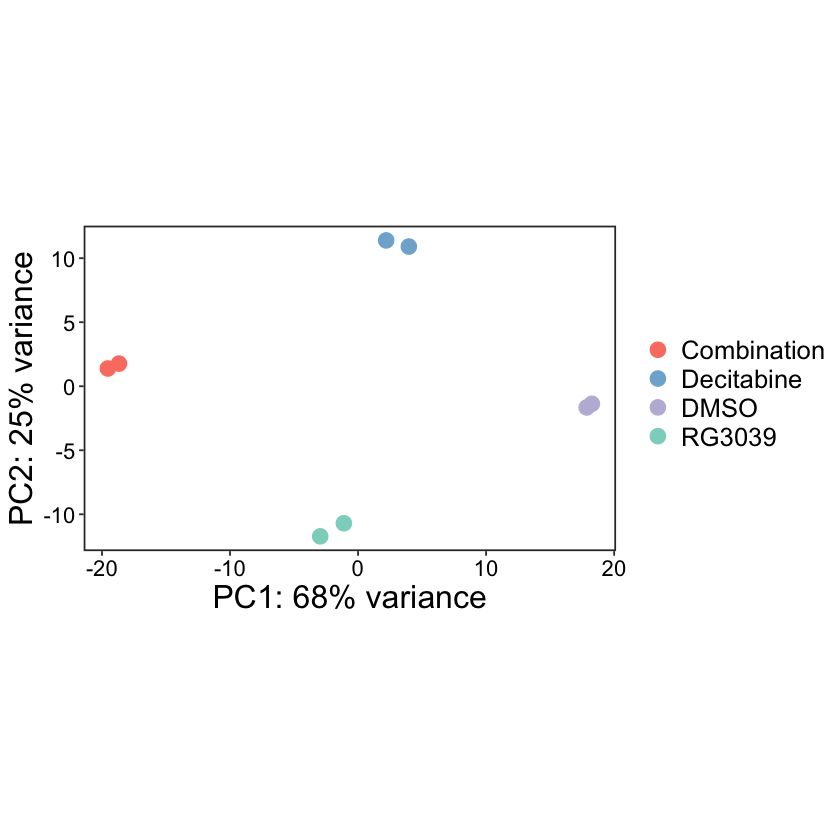

In [5]:
#plot PCA

library('RColorBrewer')
library('ggplot2')

p <- plotPCA(DESeq.rlog)
p <- p + 
theme_bw() +
theme(panel.grid.major = element_blank(),
      panel.grid.minor = element_blank(),
      panel.border = element_rect(size = 1),
      axis.text.x = element_text(size = rel(1.5), color = 'black'),
      axis.text.y = element_text(size = rel(1.5), color = 'black'),
      axis.title.x = element_text(size = rel(1.75)),
      axis.title.y = element_text(size = rel(1.75)),
      legend.title = element_blank(),
      legend.text = element_text(size = rel(1.4), color = 'black'),
      ) +
scale_color_manual(values = brewer.pal(9, 'Set3')[c(4,5,3,1)], 
                   labels = c('Combination', 'Decitabine', 'DMSO', 'RG3039')) +
geom_point(size = 4)

#ggsave('pca.eps')

p

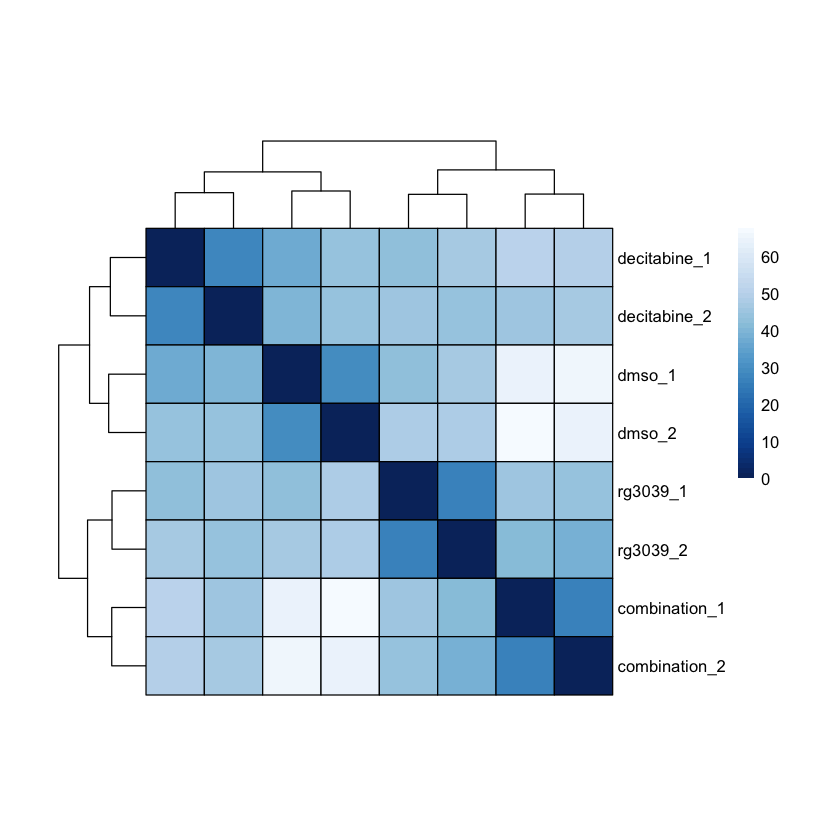

In [6]:
#install.packages('pheatmap')

library('pheatmap')
library('RColorBrewer')

#compute Euclidean distance matrix for visual correlation matrix

sampleDists <- dist(t(rlog.norm.counts))

#plot correlation matrix

sampleDistMatrix <- as.matrix(sampleDists)
rownames(sampleDistMatrix) <- names(read.counts)
colnames(sampleDistMatrix) <- NULL
colors <- colorRampPalette(rev(brewer.pal(9, 'Blues')))(50)
pheatmap(sampleDistMatrix,
         clustering_distance_rows=sampleDists,
         clustering_distance_cols=sampleDists,
         col=colors,
         cellwidth = 35,
         cellheight = 35,
         display_numbers = FALSE,
         border_color = 'black')

In [7]:
#relevel

str(colData(DESeq.ds)$condition)
colData(DESeq.ds)$condition <- relevel(colData(DESeq.ds)$condition, 'dmso')

#differential expression analysis

DESeq.ds <- DESeq(DESeq.ds)

 Factor w/ 4 levels "combination",..: 1 1 2 2 3 3 4 4


using pre-existing size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [8]:
resultsNames(DESeq.ds)

[1] "Intercept"                     "condition_combination_vs_dmso"
[3] "condition_decitabine_vs_dmso"  "condition_rg3039_vs_dmso"

In [9]:
#BiocManager::install('apeglm')

res.combination <- lfcShrink(DESeq.ds, coef = 'condition_combination_vs_dmso', type = 'apeglm')

using 'apeglm' for LFC shrinkage. If used in published research, please cite:
    Zhu, A., Ibrahim, J.G., Love, M.I. (2018) Heavy-tailed prior distributions for
    sequence count data: removing the noise and preserving large differences.
    Bioinformatics. https://doi.org/10.1093/bioinformatics/bty895



In [10]:
#output for iPAGE

res.combination.ipage <- data.frame(gene = row.names(res.combination), log2fc = res.combination[,2])

head(res.combination.ipage)

,gene,log2fc
,<fct>,<dbl>
RP11-34P13.7,RP11-34P13.7,-0.04829068
AL627309.1,AL627309.1,0.11430814
AP006222.2,AP006222.2,-0.12578802
MTND1P23,MTND1P23,-0.07643911
MTND2P28,MTND2P28,0.08758356
hsa-mir-6723,hsa-mir-6723,0.25994460


In [18]:
library('dplyr')

res.combination.ipage.sorted <- arrange(res.combination.ipage, log2fc)

write.table(res.combination.ipage.sorted, 'res.combination.ipage.txt', quote = FALSE, sep = '\t', row.names = FALSE)

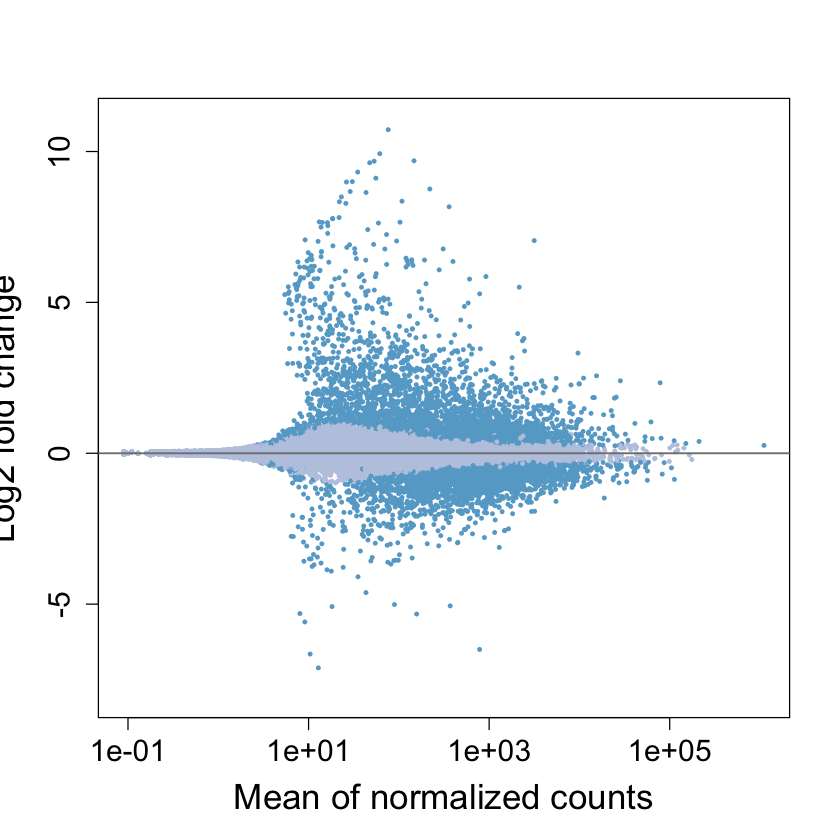

In [10]:
#library('RColorBrewer')

#postscript('ma_combination.eps', width = 6, height = 6)

plotMA(res.combination, ylim = c(-8,11), cex = 0.55, xlab = 'Mean of normalized counts',
       ylab = expression('Log2' * ' fold change'), cex.lab = 1.75, cex.axis = 1.5,
       colNonSig = brewer.pal(4, 'PuBuGn')[2], colSig = brewer.pal(4, 'PuBuGn')[3], colLine = NA)

abline(h = 0, lwd = 1.5, col = 'gray50')

#dev.off()

Loading required package: pkgmaker

Loading required package: registry


Attaching package: ‘pkgmaker’


The following object is masked from ‘package:S4Vectors’:

    new2


The following object is masked from ‘package:base’:

    isFALSE


Loading required package: rngtools

Loading required package: cluster

NMF - BioConductor layer [OK] | Shared memory capabilities [NO: bigmemory] | Cores 7/8

  To enable shared memory capabilities, try: install.extras('
NMF
')


Attaching package: ‘NMF’


The following object is masked from ‘package:DelayedArray’:

    seed


The following object is masked from ‘package:BiocParallel’:

    register


The following object is masked from ‘package:S4Vectors’:

    nrun




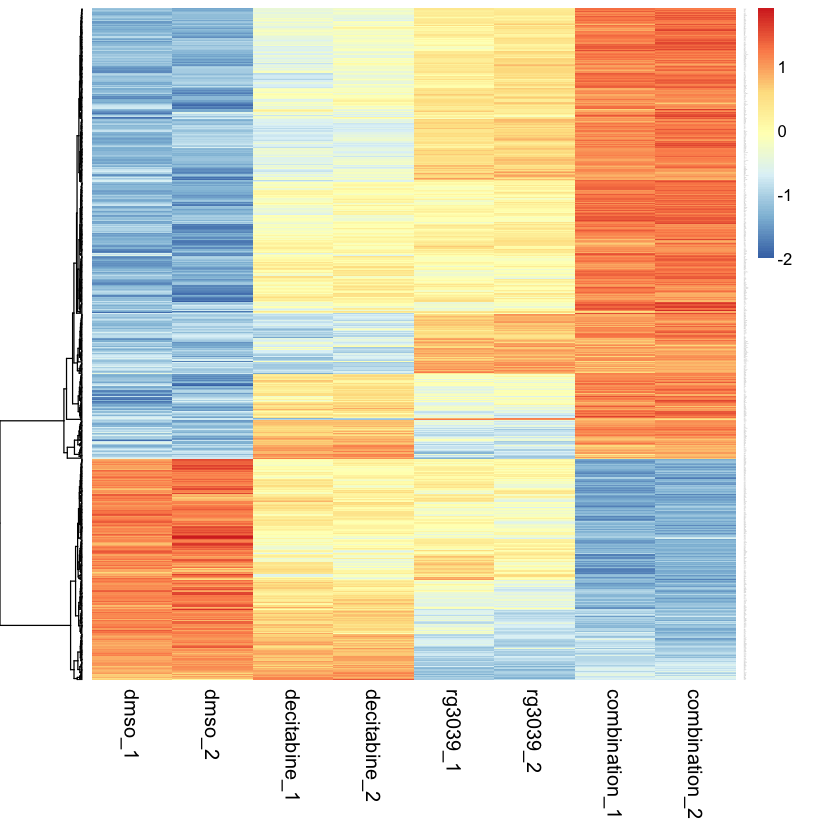

In [13]:
#install.packages('NMF')

library('NMF')

DGE.combination <- subset(res.combination, abs(log2FoldChange)>1 & res.combination$padj<1e-10)

DGE.combination.sorted <- DGE.combination[order(DGE.combination$padj), ]

hm.mat <- log.norm.counts[row.names(DGE.combination.sorted), c(5,6,3,4,7,8,1,2)]

aheatmap(hm.mat, Rowv = TRUE, Colv = NA, distfun = 'correlation', 
         hclustfun = 'average', scale = 'row')

In [14]:
DGE.combination <- subset(res.combination, log2FoldChange<0 & res.combination$padj<5e-2)

write.table(DGE.combination, 'downregulated_genes_broad.txt', sep = '\t', quote = FALSE)

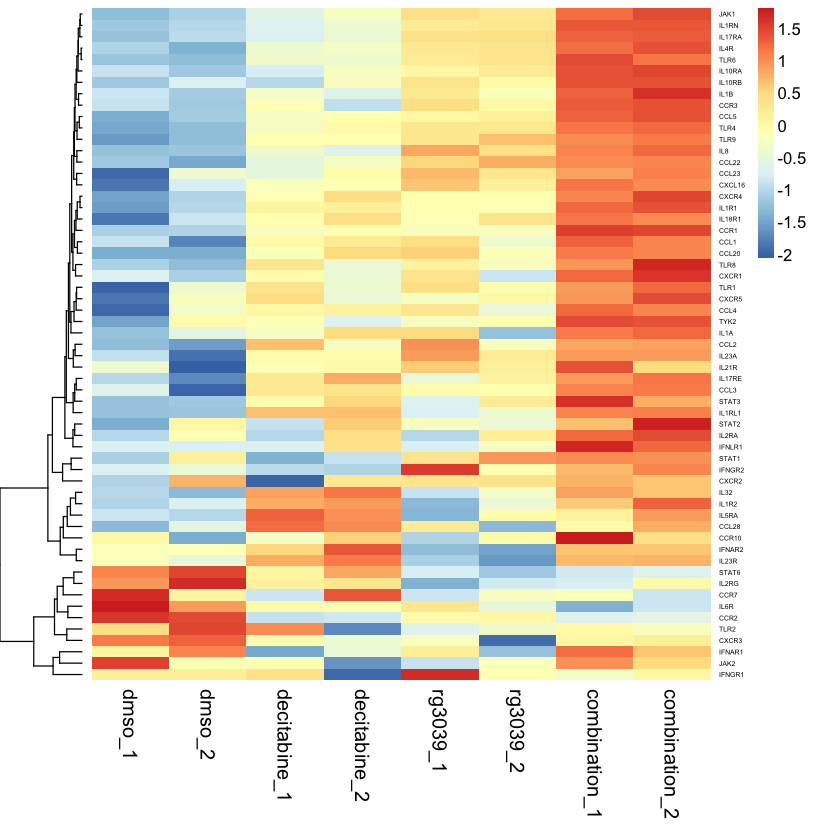

In [194]:
#looking at select genes

x <- c('STAT1', 'STAT2', 'STAT3', 'STAT4', 'STAT5', 'STAT6', 'JAK1', 'JAK2', 'TYK2', 'IL10RA', 'IL10RB',
       'IFNGR1', 'IFNGR2', 'IFNLR1', 'IFNAR1', 'IFNAR2', 'CXCR1', 'CXCR2', 'CXCR3', 'CXCR4', 'CXCR5',
       'CXCR6', 'CXCR7', 'IL1R2', 'IL1R1', 'IL1RL1', 'IL1A', 'IL1B', 'IL1RN', 'IL2RA', 'IL4R', 'IL5RA', 'IL8', 
       'IL17RA', 'IL17RE', 'IL18R1', 'IL21R', 'IL22',  'IL23A', 'IL23R', 'IL32', 'CCR1', 'CCR2', 'CCR3',
       'CCR4', 'CCR5', 'CCR6', 'CCR7', 'CCR8', 'CCR9', 'CCR10', 'CCL1', 'CCL2', 'CCL3', 'CCL3L1', 'CCL3L3',
       'CCL4', 'CCL4L1', 'CCL4L2', 'CCL5', 'CCL7', 'CCL8', 'CCL11', 'CCL13', 'CCL14', 'CCL15', 'CCL16',
       'CCL17', 'CCL18', 'CCL19', 'CCL20', 'CCL21', 'CCL22', 'CCL23', 'CCL24', 'CCL25', 'CCL26', 'CCL27',
       'CCL28', 'CXCL16', 'IL2RG', 'IL6R', 'TLR1', 'TLR2', 'TLR3', 'TLR4', 'TLR5', 'TLR6', 'TRL7', 'TLR8',
       'TLR9', 'TLR10'
       )

DGE.combination <- subset(res.combination, row.names(res.combination) %in% x & res.combination$padj<1)

DGE.combination.sorted <- DGE.combination[order(DGE.combination$padj), ]

hm.mat <- log.norm.counts[row.names(DGE.combination.sorted), c(5,6,3,4,7,8,1,2)]

aheatmap(hm.mat, Rowv = TRUE, Colv = NA, distfun = 'correlation', 
         hclustfun = 'average', scale = 'row')

In [16]:
#looking at select MAPK activated genes

x <- c('MAPKAPK2', 'MAPKAPK3', 'MAPKAPK5', 'MKNK1', 'MKNK2', 'MAP3K1', 'MAP3K2', 'MAP3K3', 'MAP3K4',
       'MAP3K5', 'MAP3K6', 'MAP3K7', 'MAP3K8', 'MAP3K9', 'MAP3K10', 'MAP3K11', 'MAP3K12', 'MAP3K13',
       'MAP3K14', 'MAP3K15')

DGE.combination <- subset(res.combination, row.names(res.combination) %in% x)

DGE.combination.sorted <- DGE.combination[order(DGE.combination$padj), ]

hm.mat <- log.norm.counts[row.names(DGE.combination.sorted), c(5,6,3,4,7,8,1,2)]

aheatmap(hm.mat, Rowv = TRUE, Colv = NA, distfun = 'correlation', 
         hclustfun = 'average', scale = 'row', file = 'ras.pdf')

Loading required package: pkgmaker
Loading required package: registry

Attaching package: ‘pkgmaker’

The following object is masked from ‘package:S4Vectors’:

    new2

The following object is masked from ‘package:base’:

    isFALSE

Loading required package: rngtools
Loading required package: cluster
NMF - BioConductor layer [OK] | Shared memory capabilities [NO: bigmemory] | Cores 7/8
  To enable shared memory capabilities, try: install.extras('
NMF
')

Attaching package: ‘NMF’

The following object is masked from ‘package:DelayedArray’:

    seed

The following object is masked from ‘package:BiocParallel’:

    register

The following object is masked from ‘package:S4Vectors’:

    nrun



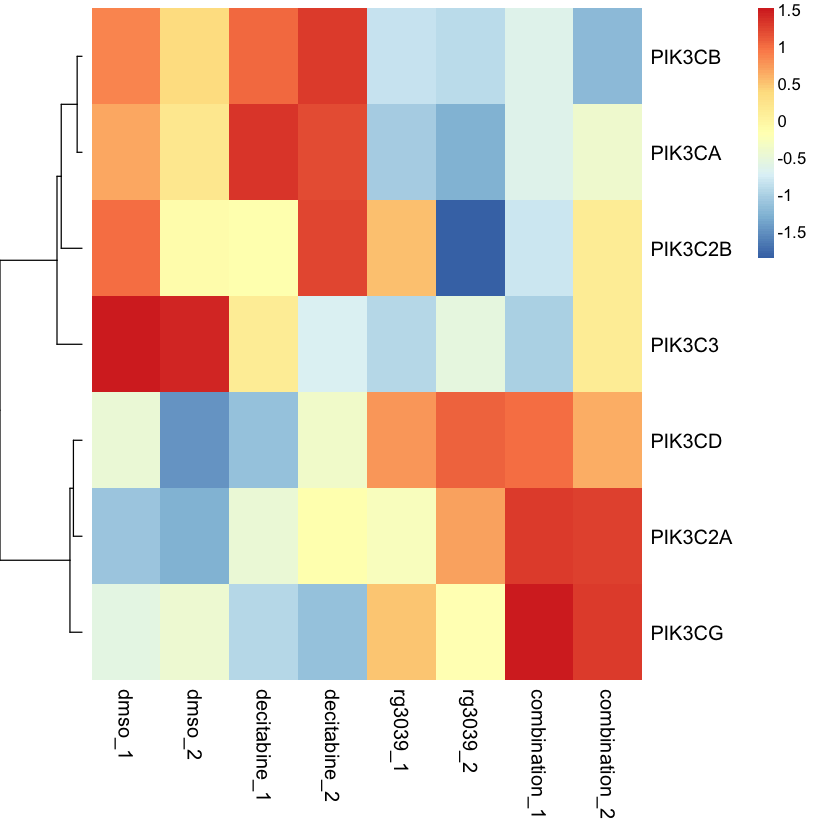

In [21]:
library('NMF')

#looking at select PI3K signaling genes

x <- c('PIK3CA', 'PIK3CB', 'PIK3CG', 'PIK3C2A', 'PIK3CD', 'PIK3C2B', 'PIK3C2G', 'PIK3C3')

DGE.combination <- subset(res.combination, row.names(res.combination) %in% x)

DGE.combination.sorted <- DGE.combination[order(DGE.combination$padj), ]

hm.mat <- log.norm.counts[row.names(DGE.combination.sorted), c(5,6,3,4,7,8,1,2)]

aheatmap(hm.mat, Rowv = TRUE, Colv = NA, distfun = 'correlation', 
         hclustfun = 'average', scale = 'row')

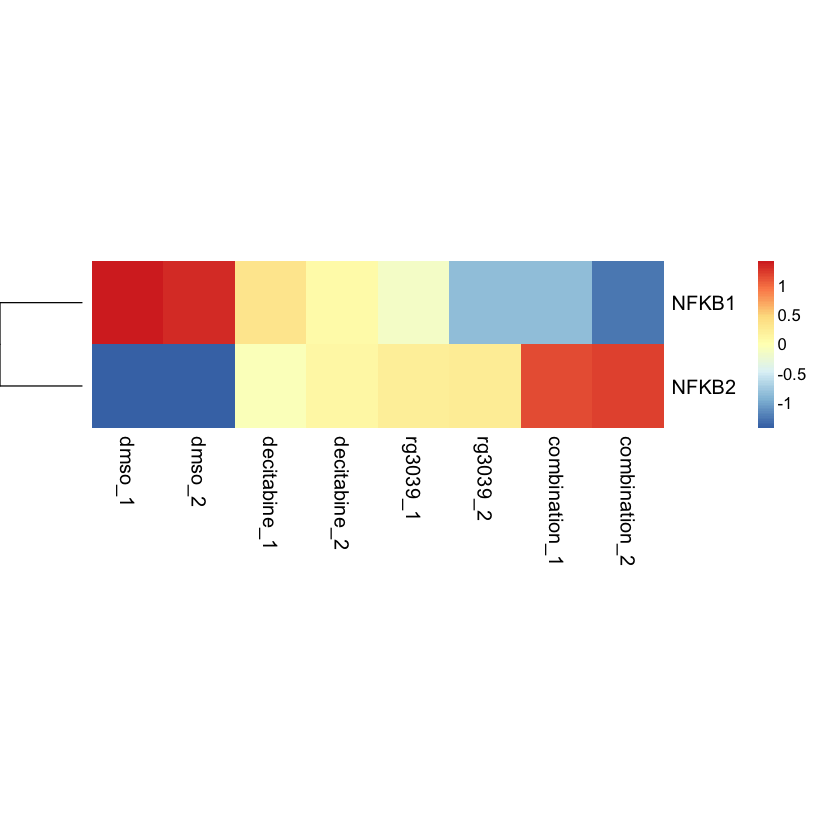

In [147]:
#looking at select NKFB genes

x <- c('NFKB2', 'NFKB1')

DGE.combination <- subset(res.combination, row.names(res.combination) %in% x)

DGE.combination.sorted <- DGE.combination[order(DGE.combination$padj), ]

hm.mat <- log.norm.counts[row.names(DGE.combination.sorted), c(5,6,3,4,7,8,1,2)]

aheatmap(hm.mat, Rowv = TRUE, Colv = NA, distfun = 'correlation', 
         hclustfun = 'average', scale = 'row', cellheight = 50)

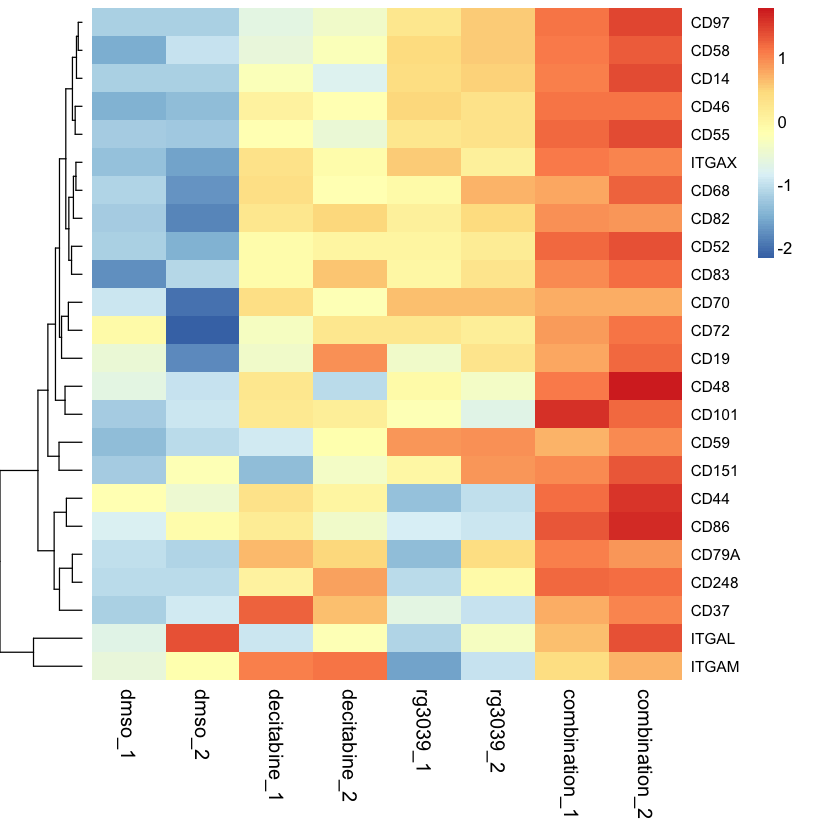

In [145]:
#looking at select lineage markers

x <- c('ITGAL', 'ITGAX', 'ITGAM', 'CD55', 'CD19', 'CD68', 'CD70', 'CD97', 'CD79A', 'CD37', 'CD52', 'CD58',
       'CD48', 'CD101', 'CD46', 'CD86', 'CD14', 'CD83', 'CD72', 'CD151', 'CD59', 'CD44', 'CD82', 'CD248')

DGE.combination <- subset(res.combination, row.names(res.combination) %in% x)

DGE.combination.sorted <- DGE.combination[order(DGE.combination$padj), ]

hm.mat <- log.norm.counts[row.names(DGE.combination.sorted), c(5,6,3,4,7,8,1,2)]

aheatmap(hm.mat, Rowv = TRUE, Colv = NA, distfun = 'correlation', 
         hclustfun = 'average', scale = 'row')

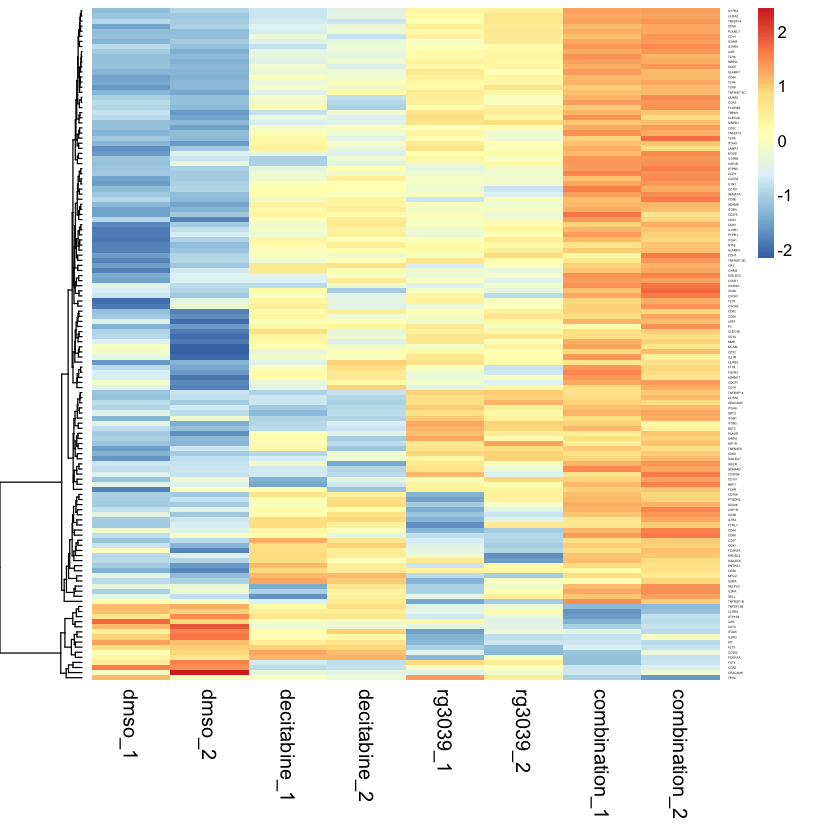

In [205]:
#looking at all significantly-differentially-expressed HUGO CD genes

x <- read.table('group-471.csv', sep = ',', header = TRUE)

DGE.combination <- subset(res.combination, row.names(res.combination) %in% x$Approved.symbol & 
                          res.combination$padj<0.05)

DGE.combination.sorted <- DGE.combination[order(DGE.combination$padj), ]

hm.mat <- log.norm.counts[row.names(DGE.combination.sorted), c(5,6,3,4,7,8,1,2)]

aheatmap(hm.mat, Rowv = TRUE, Colv = NA, distfun = 'correlation', 
         hclustfun = 'average', scale = 'row')
         #, cellheight = 40, cellwidth = 40, file = 'CD.pdf')

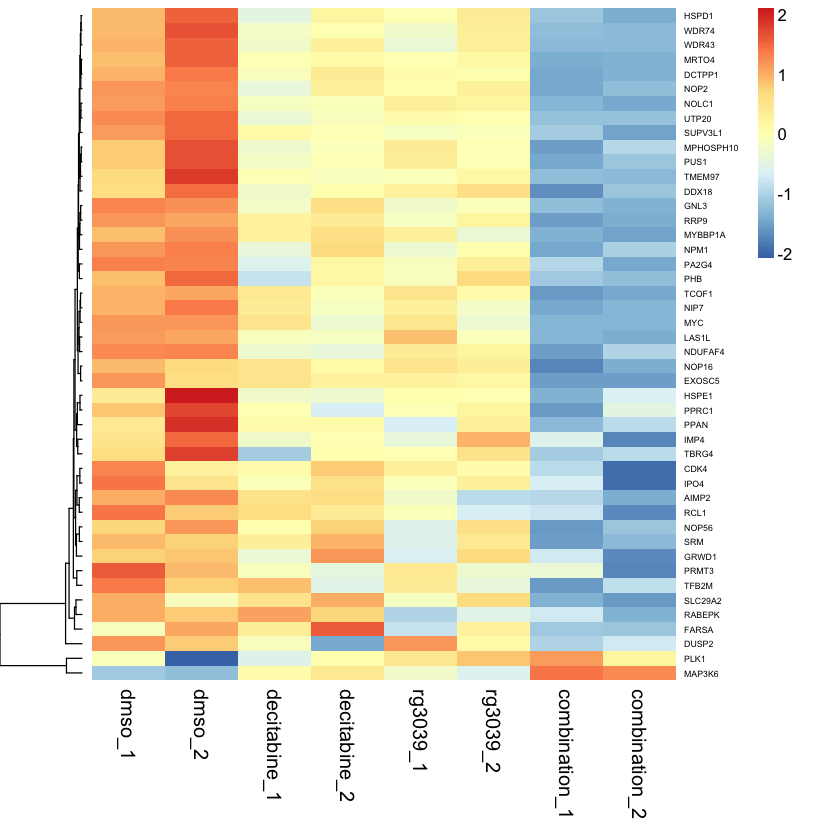

In [159]:
#looking at myc_v2 genes

x <- read.table('myc_v2.txt', sep = '\t', header = FALSE)

DGE.combination <- subset(res.combination, row.names(res.combination) %in% x$V1 & 
                          res.combination$padj<0.05)

DGE.combination.sorted <- DGE.combination[order(DGE.combination$padj), ]

hm.mat <- log.norm.counts[row.names(DGE.combination.sorted), c(5,6,3,4,7,8,1,2)]

aheatmap(hm.mat, Rowv = TRUE, Colv = NA, distfun = 'correlation', 
         hclustfun = 'average', scale = 'row')

In [191]:
#looking at p53 genes

x <- read.table('hallmark_p53.txt', sep = '\t', header = FALSE)

DGE.combination <- subset(res.combination, row.names(res.combination) %in% x$V1 & 
                          res.combination$padj<0.05)

DGE.combination.sorted <- DGE.combination[order(DGE.combination$padj), ]

hm.mat <- log.norm.counts[row.names(DGE.combination.sorted), c(5,6,3,4,7,8,1,2)]

aheatmap(hm.mat, Rowv = TRUE, Colv = NA, distfun = 'correlation', 
         hclustfun = 'average', scale = 'row', file = 'hallmark_p53.pdf')

In [187]:
res.rg3039 <- lfcShrink(DESeq.ds, coef = 'condition_rg3039_vs_dmso', type = 'apeglm')

using 'apeglm' for LFC shrinkage. If used in published research, please cite:
    Zhu, A., Ibrahim, J.G., Love, M.I. (2018) Heavy-tailed prior distributions for
    sequence count data: removing the noise and preserving large differences.
    Bioinformatics. https://doi.org/10.1093/bioinformatics/bty895


In [190]:
DGE.rg3039 <- subset(res.rg3039, res.rg3039$log2FoldChange>0 & res.rg3039$padj<0.05)

DGE.rg3039

write.table(DGE.rg3039, 'rg3039_upregulated_genes_broad.txt', quote = FALSE, sep = '\t')

log2 fold change (MAP): condition rg3039 vs dmso 
Wald test p-value: condition rg3039 vs dmso 
DataFrame with 1479 rows and 5 columns
                     baseMean    log2FoldChange             lfcSE
                    <numeric>         <numeric>         <numeric>
LINC00115    30.2518173808391   1.2749852554103 0.967985597801893
AL645728.1   119.027511675541  2.09800294840007  0.47519747251783
C1orf233      596.63130558958  2.38539750346595 0.217492613672572
RP11-345P4.9 190.863583916506  2.43992276926279 0.321323519873689
PRKCZ        184.490611023685  2.42320039945498 0.412959131021343
...                       ...               ...               ...
MT-TL1       78332.8695943784  1.34474380066082   0.1581719890409
MT-TY        349.563574303601  1.13647841834157 0.316770823374154
MT-TS2       110.001652692765  0.90063514480701 0.420125501160362
MT-ND6       737.601232786214 0.495978363582984 0.208945688267005
MT-TP        263.806638259474 0.873194539620857 0.276982841692487
        

In [29]:
#looking at select genes

x <- read.table('h_tnfa_via_nfkb.txt', sep = '\t', header = FALSE, skip = 5)

DGE.combination <- subset(res.combination, row.names(res.combination) %in% x$V1 & res.combination$padj<1)

DGE.combination.sorted <- DGE.combination[order(DGE.combination$padj), ]

hm.mat <- log.norm.counts[row.names(DGE.combination.sorted), c(5,6,3,4,7,8,1,2)]

aheatmap(hm.mat, Rowv = TRUE, Colv = NA, distfun = 'correlation', 
         hclustfun = 'average', scale = 'row', width = 4, height = 4, file = 'test.pdf')

In [75]:
#for ray
library('NMF')

ray_genes <- read.table('ray_apoptosis.txt', col.names = 'x', colClasses = 'character')

hm.mat <- log.norm.counts[ray_genes$x[1:15], c(5,6,3,4,7,8,1,2)] 

#aheatmap(hm.mat, Rowv = TRUE, Colv = NA, distfun = 'correlation', 
#         hclustfun = 'average', scale = 'r1')

#write.table(hm.mat, 'ray_table.txt', quote = FALSE, row.names = TRUE, col.names = TRUE, sep = '\t')

bax_exp <- data.frame(condition = gsub('_[0-9]+', '', row.names(t(hm.mat))), 
                      replicate = str_sub(row.names(t(hm.mat)), start = -1), exp = hm.mat['BAX',])

bax_exp$condition <- factor(bax_exp$condition, levels = c('dmso', 'decitabine', 'rg3039', 'combination'))

#pdf('bax_exp.pdf')
#plot(data = bax_exp, exp ~ condition, main = 'BAX expression')
#dev.off()

DGE.combination <- subset(res.combination, row.names(res.combination) %in% ray_genes$x & res.combination$padj<0.05)

hm.mat.two <- log.norm.counts[row.names(DGE.combination), c(5,6,3,4,7,8,1,2)]

#aheatmap(hm.mat.two, Rowv = TRUE, Colv = NA, distfun = 'correlation', 
#         hclustfun = 'average', scale = 'row', file = 'ray_5e-2.pdf')

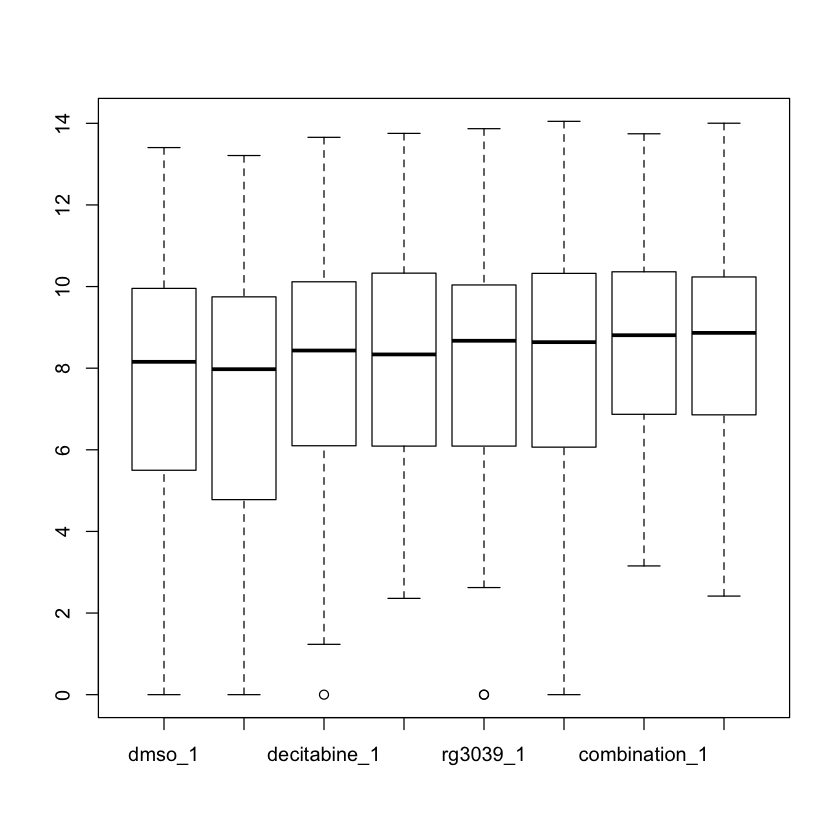

In [72]:
#for ray
trail_genes <- read.table('hamai_trail.txt', col.names = 'x', colClasses = 'character', skip = 3)

DGE.combination <- subset(res.combination, row.names(res.combination) %in% trail_genes$x & res.combination$padj<0.05)

hm.mat <- log.norm.counts[row.names(DGE.combination), c(5,6,3,4,7,8,1,2)] 

aheatmap(hm.mat, Rowv = TRUE, Colv = NA, distfun = 'correlation', 
         hclustfun = 'average', scale = 'row', file = 'trail_5e-2.pdf')

boxplot(hm.mat)